<h1> Problema de la Subsecuencia Común más Larga (SCL)</h1>

<b>El problema:</b>

Dadas dos secuencias $X[1..m]$ y $Y[1..n]$, encuentré la subsecuencia más larga que es comun tanto a la secuencia $X$ como a $Y$.

<b> Ejemplo: </b>

$X = ABCBDAB$

$Y = BDCABA$

<h2>Un primer enfoque:</h2>

Verificar cada subsecuencia de $X[1..m]$ para ver si es también una subsecuencia de $Y[1..n]$

El procedimiento verificar toma una subsecuencia $subx$ y recorre en orden cada posición en $Y$ buscando coincidencias

In [69]:
#Procedimiento verificar
def verificar(subx, Y):
    idx_subx = 0; tam_subx = 0;
    if len(subx)>len(Y): return 0
    for i in Y:
        if subx[idx_subx] == i:
            idx_subx+=1
        if idx_subx == len(subx):
            return 1
    else:
        return 0

In [70]:
verificar('arc','adbdc')

0

In [71]:
import itertools

def lcs1(X,Y):
    #lst = list(itertools.product([0, 1], repeat=len(X)))
    lgst = ''
    for i in range(1,len(X)):
        for j in list(itertools.combinations(X, i)):
            if verificar(j,Y) == 1:
                lgst = j
    return ''.join(lgst)

In [72]:
lcs1('ABCBDAB','BDCABA')

'BDAB'

In [6]:
#Análisis

<h2>¿Por qué hacerlo mejor?</h2>

 <ul>
  <li><a href="https://www.genome.gov/11006943/">¿Que tan grande es el genoma humano?</a></li>
  <li>El crecimiento exponencial hace parecer diminuto el cambio tecnológico. </li>
  <li>Supongamos un gigantesco computador en paralelo con tantos procesadores como atomos tiene el universo y cada procesador tiene la potencia de un supercomputador y cada procesador trabaja la vida del universo</li>
</ul> 

 <table style="width:100%">
  
  <tr>
    <td><a href="https://en.wikipedia.org/wiki/Observable_universe#Matter_content_.E2.80.93_number_of_atoms">Electrones en el universo</a></td>
    <td>$10^{80}$</td>
  </tr>
  <tr>
    <td><a href="https://en.wikipedia.org/wiki/Supercomputer">FLOPS del más rápido supercomputador a junio de 2016</a></td>
    <td>$10^{16}$</td>    
  </tr>
  <tr>
    <td><a href="http://www.space.com/24054-how-old-is-the-universe.html">Edad del universo en segundos</a></td>
    <td>$10^{17}$</td>
    
  </tr>
</table> 


Aún con este computador con capacidad irreal, resolver un problema donde una de las cadenas es de tamaño 1000 tomaría más de $3.4 x 10^{180}$ años.

$$2^{1000} >> 10^{80}\times 10^{16} \times 10^{17}$$


In [7]:
(2**1000/10**113)/(365*24*3600)

3397731504268985670181459440195338059872541894043422144354865513604613936849746710087513885133485090460409287536634788258457462219978164775489782335964794141278084657161412666609929L

<h2>¿Cómo podemos hacerlo mejor?</h2>

Simplificación:

 <ol type="I">
  <li>Encontrar la longitud de la subsecuencia común más larga $|SCL(x,y)|$ (Notación funcional)</li>
  <li>Extender el algoritmo para encontrar SCL</li>
</ol> 

Estrategía para encontrar la longitud de la subsecuencia común más larga $|SCL(x,y)|:

 <ul>
  <li>Considere prefijos de X y Y</li>
  <li>Definimos $c[i,j] = |SCL(X[1..i],Y[1..j])|$</li>
  <li>Entonces $c[m,n]=|SCL(X,Y)|$</li>
</ul> 

<i>Si $Z = SCL(X,Y)$ entonces algún prefijo de $Z$ es una SCL de un prefijo de $X$ y un prefijo de $Y$</i>

<b>Subestructura óptima</b> <i>La solución óptima a un problema contiene las soluciones óptimas de los subproblemas</i>


Teorema:
$$
c[i,j]= 
\begin{cases}
    c[i-1,j-1]+1,& \text{si } X[i] = Y[j]\\
    \max\{c[i,j-1],c[i-1,j] \},              & \text{dlc}
\end{cases}
$$

In [8]:
def lcs2(x,y,i,j):
    if i == 0 or j == 0:
        return 0
    if x[i-1]==y[j-1]:
        return lcs2(x,y,i-1,j-1)+1
    else:
        return max(lcs2(x,y,i-1,j),lcs2(x,y,i,j-1))

In [9]:
lcs2('ABC','AWBDC',3,5)

3

In [10]:
#Análisis

<b>Sobreposición de los subproblemas</b><i>Una solución recursiva contiene una cantidad de distintos subproblemas repetidos varias veces</i>

El espacio de subproblemas de SCL contiene $m\times n$ distintos subproblemas.

<h2>¿Cómo podemos hacerlo mejor?</h2>

Memorizar las soluciones a los subproblemas

In [11]:
import numpy as np

global C

def lcs(X,Y):
    global C
    C = np.ones((len(X)+1,len(Y)+1))*-1
    lcs3(X,Y,len(X),len(Y))
    return C[len(X),len(Y)], C
    

def lcs3(x,y,i,j):
    global C
    if C[i,j] == -1:
        if i == 0 or j == 0:
            C[i,j] = 0
        else:
            if x[i-1]==y[j-1]:
                C[i,j] = lcs3(x,y,i-1,j-1)+1
            else:
                C[i,j] = max(lcs3(x,y,i-1,j),lcs3(x,y,i,j-1))
                
    return C[i,j]

In [12]:
len_lcs, lcs_mat = lcs('ABC','AWBDC')

In [13]:
print lcs_mat

[[ 0. -1.  0.  0.  0. -1.]
 [-1.  1.  1.  1.  1. -1.]
 [-1. -1. -1.  2.  2. -1.]
 [-1. -1. -1. -1. -1.  3.]]


In [14]:
#Análisis

<h3>¿Cómo reconstruir la subsecuencia común más larga?</h3>

<h2>Comparemos los algoritmos</h2>

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import lcs
import time

In [12]:
alph = r'AGTC'
lst_lcs1 = []
lst_lcs2 = []
lst_lcs3 = []
for i in range(2,100,10):
    X = lcs.id_generator(i, 'AGTC')
    Y = lcs.id_generator(i, 'AGTC')
    tic = time.clock()#get start time
    A = lcs.lcs1(X,Y)
    toc = time.clock()#get final time
    lst_lcs1.append(toc - tic) 
    tic = time.clock()#get start time
    b = lcs.lcs2(X,Y,len(X),len(Y))
    toc = time.clock()#get final time
    lst_lcs2.append(toc - tic) 
    tic = time.clock()#get start time
    clen, cmat = lcs.lcs(X,Y)
    toc = time.clock()#get final time
    lst_lcs3.append(toc - tic)

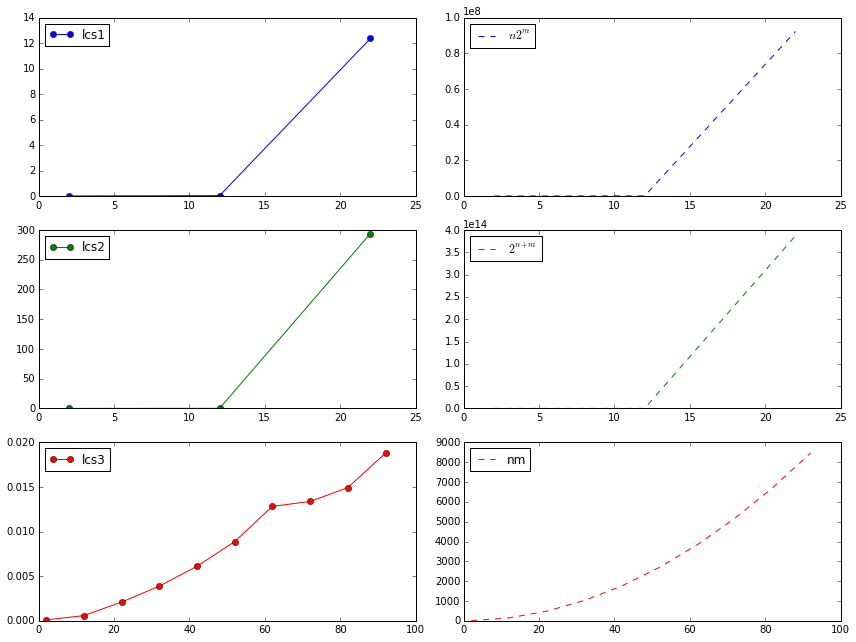

In [68]:
f, axarr = plt.subplots(3, 2)
axarr[0,0].plot(range(2,30,10),lst_lcs1,'-ob',label='lcs1')
axarr[0,0].legend(loc=2)
axarr[0,1].plot(range(2,30,10),np.array(range(2,30,10))*2.**np.array(range(2,30,10)),'--b',label=r'$n2^m$')
axarr[0,1].legend(loc=2)
axarr[1,0].plot(range(2,30,10),lst_lcs2,'-og',label='lcs2')
axarr[1,0].legend(loc=2)
axarr[1,1].plot(range(2,30,10),np.array(range(2,30,10))*2.**(2*np.array(range(2,30,10))),'--g',label='$2^{n+m}$')
axarr[1,1].legend(loc=2)
axarr[2,0].plot(range(2,100,10),lst_lcs3,'-or',label='lcs3')
axarr[2,0].legend(loc=2)
axarr[2,1].plot(range(2,100,10),np.array(range(2,100,10))**2,'--r',label='nm')
axarr[2,1].legend(loc=2)
f.set_size_inches(12,9)
f.tight_layout()